In [1]:
import os
import pandas as pd
import numpy as np
import constants as const
import matplotlib.pyplot as plt

from xgboost import XGBClassifier

<h4>Get data</h4>

In [2]:
list_obj = [obj for obj in os.listdir(const.PREPROCESSED_FOLDER) if const.CSV in obj]

In [3]:
len(list_obj)

490

<h4>Split train/test</h4>

In [4]:
TRAIN_PERC = 0.8
NUM_TRAIN = int(len(list_obj) * TRAIN_PERC)

In [5]:
list_obj[0]

'T0_Id300835.actLabel.csv'

In [6]:
np.random.shuffle(list_obj)

In [7]:
list_obj[0]

'T0_Id300315.actLabel.csv'

In [8]:
list_obj_train = list_obj[:NUM_TRAIN]
list_obj_test = list_obj[NUM_TRAIN:]

In [9]:
print(len(list_obj_train))
print(len(list_obj_test))

392
98


In [10]:
def load_data(list_obj):
    list_df = []
    for obj in list_obj:
        path = os.path.join(const.PREPROCESSED_FOLDER, obj)
        list_df.append(pd.read_csv(path))
    data = pd.concat(list_df).values
    label = data[:, 0]
    feats = data[:, 1:]
    return feats, label

def bar_plot(
    x_value, y_value, *args, 
    x_label=None, y_label=None, 
    title=None, figsize=(10, 5)
):
    fig = plt.figure(figsize=figsize) 
    plt.bar(x_value, y_value, 
            color ='maroon',
            width = 0.4)

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [11]:
train_feats, train_label = load_data(list_obj_train)
test_feats, test_label = load_data(list_obj_test)

In [12]:
train_label += 1
test_label += 1

In [13]:
train_lbl, train_cnt = np.unique(train_label, return_counts=True)
test_lbl, test_cnt = np.unique(test_label, return_counts=True)

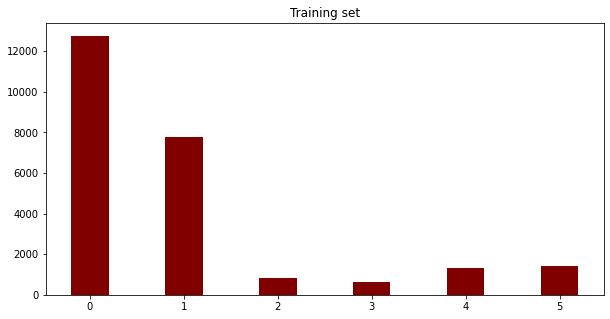

In [14]:
bar_plot(train_lbl, train_cnt, title="Training set")

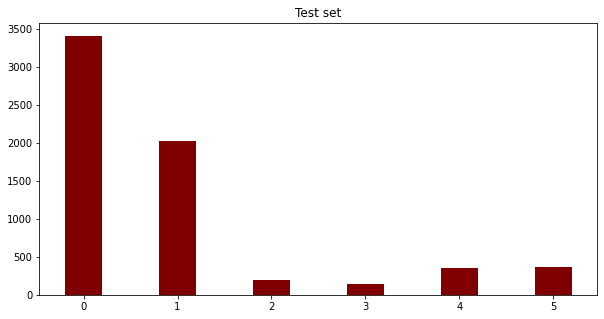

In [15]:
bar_plot(test_lbl, test_cnt, title="Test set")

In [16]:
print(train_feats.shape, train_label.shape)
print(test_feats.shape, test_label.shape)

(24672, 450) (24672,)
(6472, 450) (6472,)


<h4>Train model XGBoost</h4>

In [17]:
model = XGBClassifier(n_estimators=5, max_depth=30, learning_rate=1, objective='multi:softmax', num_class=6, use_label_encoder=False)

In [18]:
model.fit(train_feats, train_label)

[14:47:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117836726/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=1, max_delta_step=0,
              max_depth=30, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=5, n_jobs=12, num_class=6,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

<h4>Get predictions from trained model</h4>

In [19]:
preds = model.predict(test_feats)

In [20]:
np.unique(preds)

array([0, 1, 2, 3, 4, 5])

<h4>Accuracy</h4>

In [21]:
correct = (preds == test_label).sum() 
acc = correct / len(test_label)

In [22]:
acc

0.7424289245982695